In [ ]:
import pandas as pd
data= pd.read_csv("ett.csv")

In [ ]:
data.head()

,date,HUFL,HULL,MUFL,MULL,LUFL,LULL,OT
0,2016-07-01 00:00:00,5.827,2.009,1.599,0.462,4.203,1.340,30.531000
1,2016-07-01 01:00:00,5.693,2.076,1.492,0.426,4.142,1.371,27.787001
2,2016-07-01 02:00:00,5.157,1.741,1.279,0.355,3.777,1.218,27.787001
3,2016-07-01 03:00:00,5.090,1.942,1.279,0.391,3.807,1.279,25.044001
4,2016-07-01 04:00:00,5.358,1.942,1.492,0.462,3.868,1.279,21.948000


In [ ]:
#Check for missing data
data.isnull().sum()


,0
date,0
HUFL,0
HULL,0
MUFL,0
MULL,0
LUFL,0
LULL,0
OT,0


<Axes: title={'center': 'Oil Temperature Over Time'}, xlabel='date'>

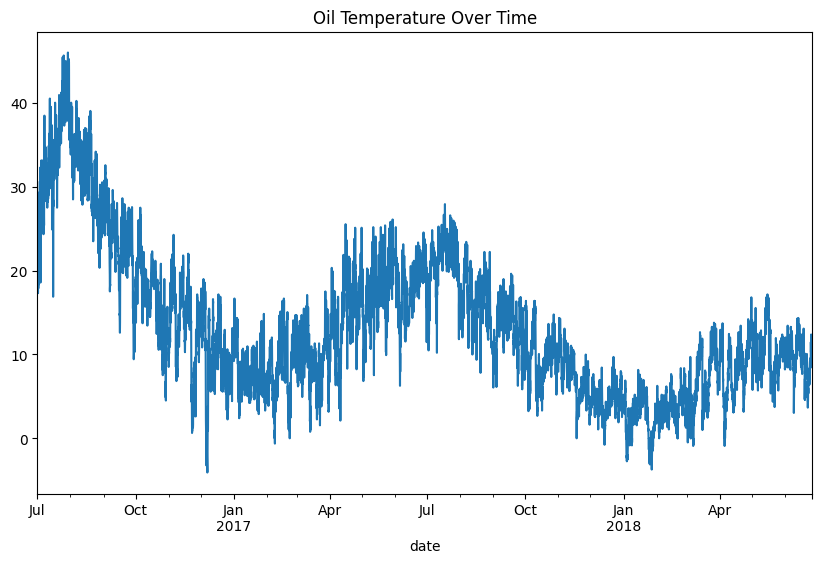

In [ ]:
data['date'] = pd.to_datetime(data['date'])
data.set_index('date', inplace=True)
data['OT'].plot(figsize=(10, 6), title='Oil Temperature Over Time')


#EDA

Understanding Data Trends (Initial Visualizations)

<Axes: title={'center': 'Oil Temperature with Moving Averages'}, xlabel='date'>

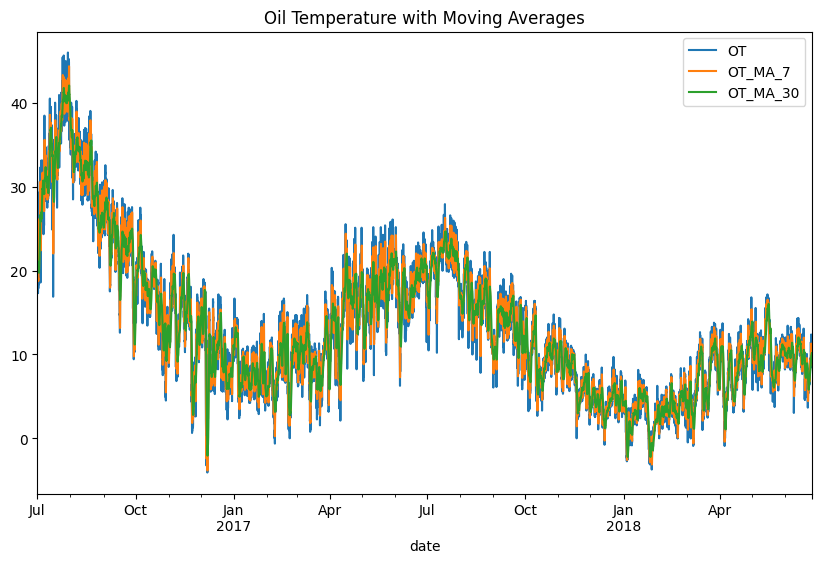

In [ ]:
data['OT_MA_7'] = data['OT'].rolling(window=7).mean()
data['OT_MA_30'] = data['OT'].rolling(window=30).mean()
data[['OT', 'OT_MA_7', 'OT_MA_30']].plot(figsize=(10,6), title='Oil Temperature with Moving Averages')


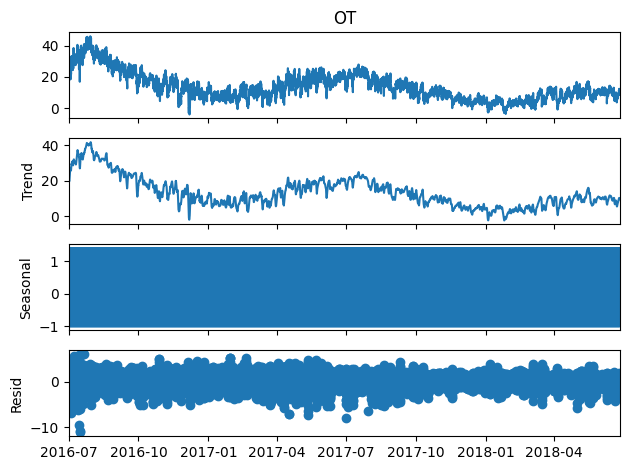

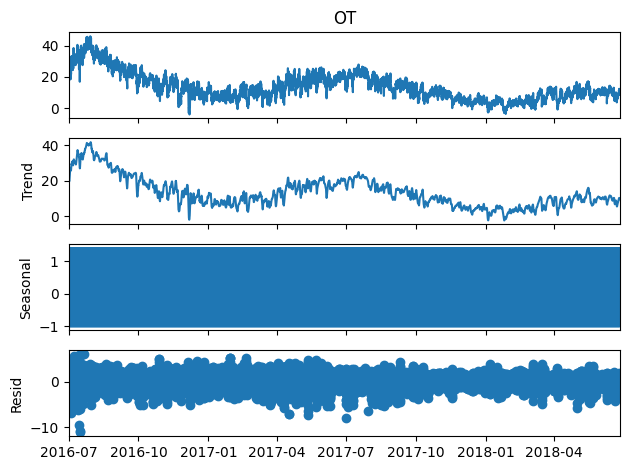

In [ ]:
#Decompose the time series to separate out trends, seasonality, and noise.
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(data['OT'], model='additive', period=24) # assuming hourly data
decomposition.plot()


#Data Integrity Check (Missing Values, Outliers)

In [ ]:
#Check for missing values
data.isnull().sum()


,0
HUFL,0
HULL,0
MUFL,0
MULL,0
LUFL,0
LULL,0
OT,0
OT_MA_7,6
OT_MA_30,29


<Axes: >

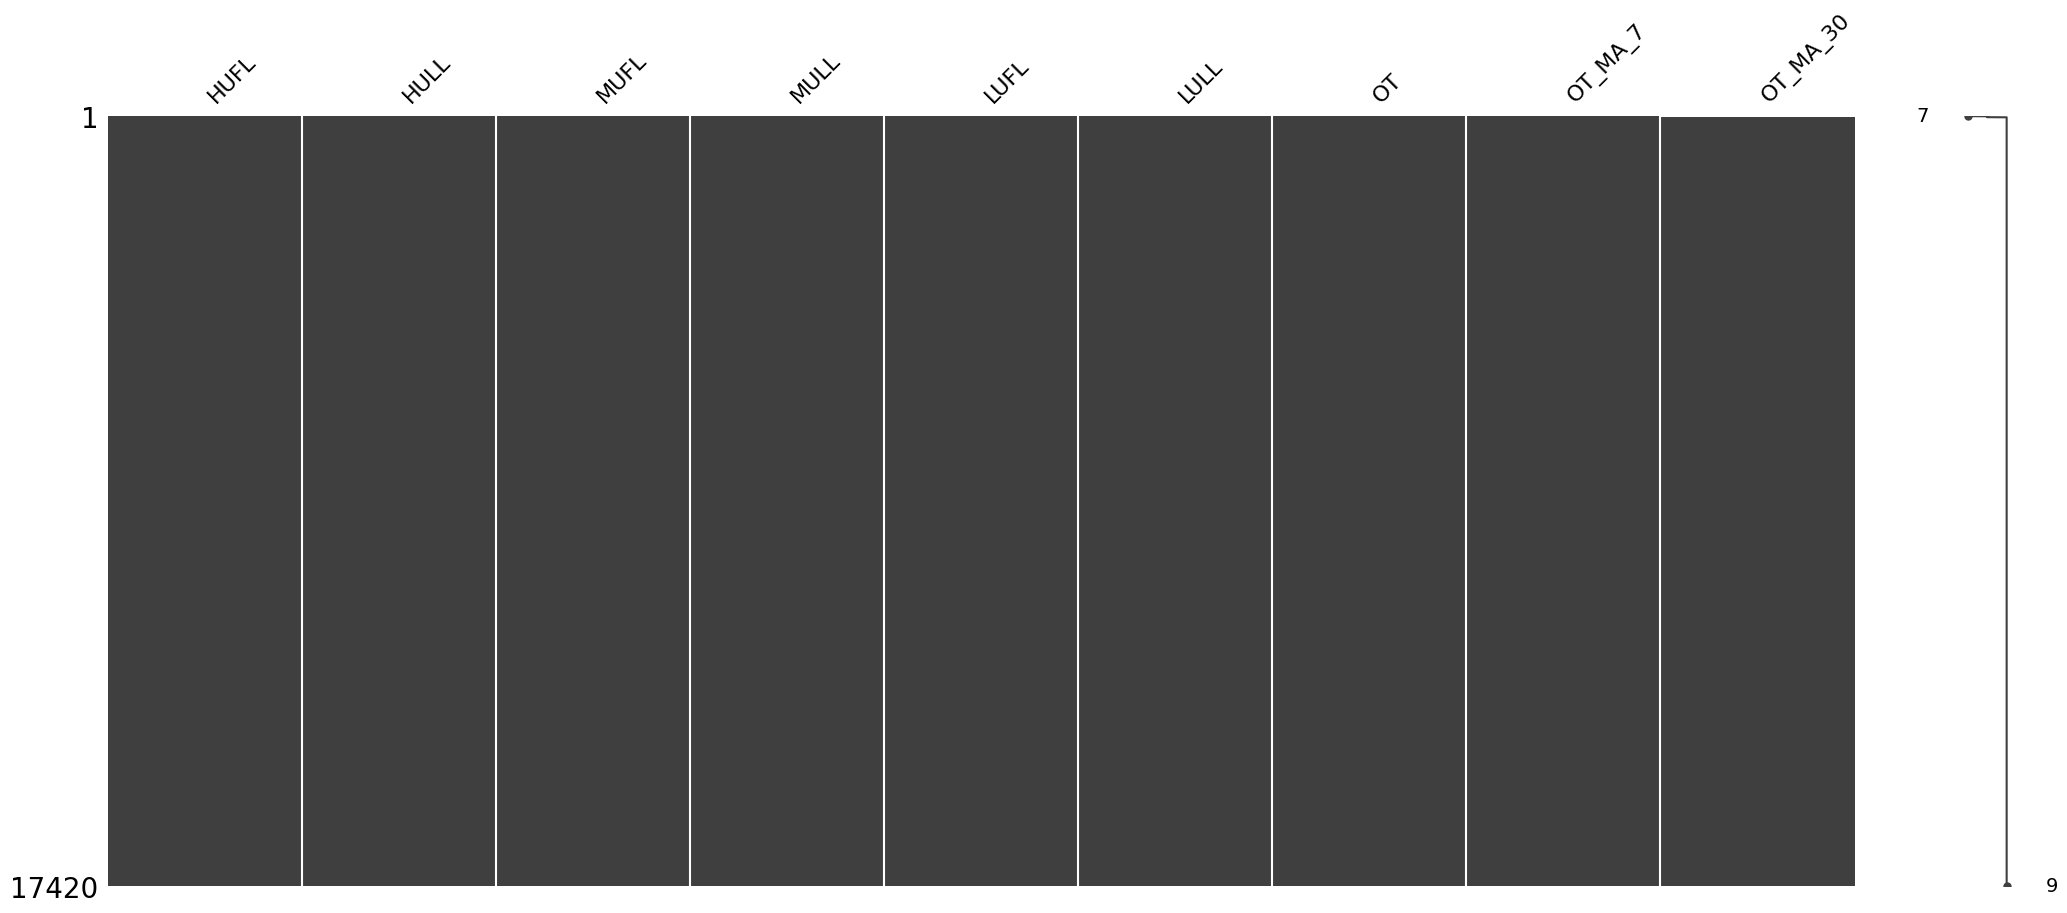

In [ ]:
#Missing values exist, visualizing gaps in the time series.
import missingno as msno
msno.matrix(data)


<Axes: xlabel='OT'>

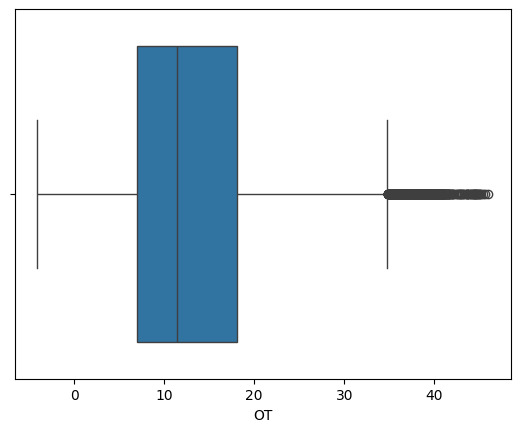

In [ ]:
#Visualize outliers in oil temperature using a boxplot
import seaborn as sns
sns.boxplot(x=data['OT'])


Seasonal and Temporal Features

In [ ]:
data['hour'] = data.index.hour
data['day'] = data.index.day
data['weekday'] = data.index.weekday
data['month'] = data.index.month


<Axes: xlabel='hour', ylabel='OT'>

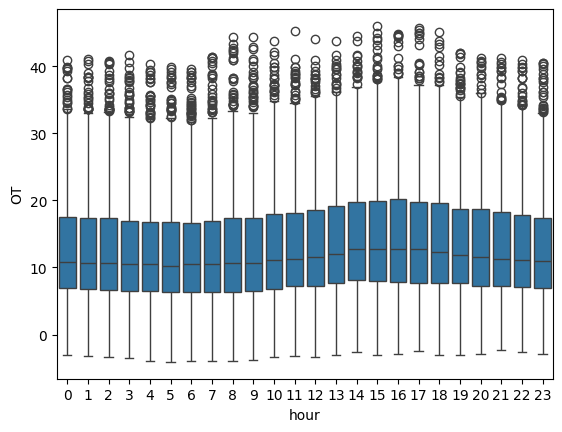

In [ ]:
#Analyze how OT behaves with respect to these features using boxplots or line plots
sns.boxplot(x='hour', y='OT', data=data)



<Axes: xlabel='weekday', ylabel='OT'>

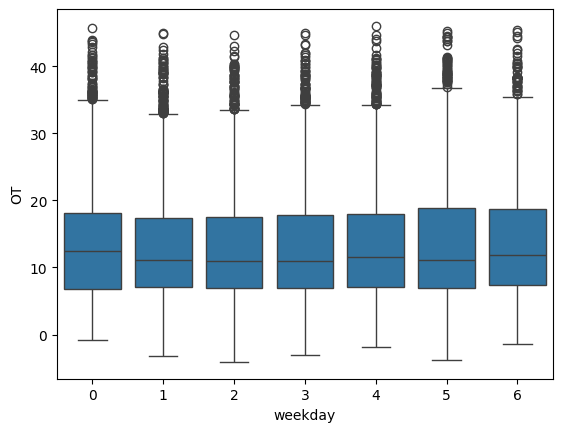

In [ ]:
sns.boxplot(x='weekday', y='OT', data=data)

Correlation Analysis (Feature Relationships)

<Axes: >

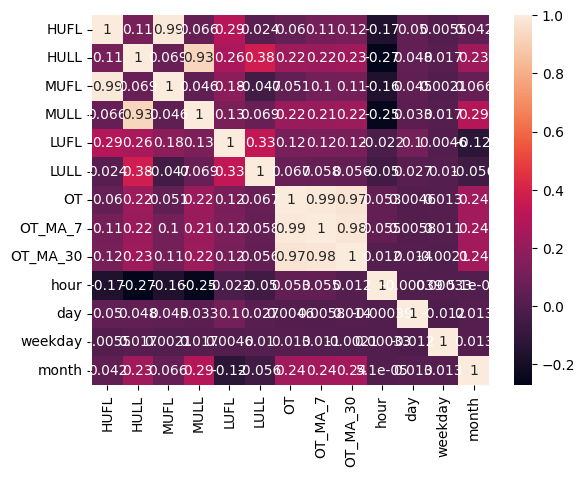

In [ ]:
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True)


Stationarity Check

In [ ]:
#Conduct an Augmented Dickey-Fuller (ADF) Test to check for stationarity
from statsmodels.tsa.stattools import adfuller
result = adfuller(data['OT'])
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')


ADF Statistic: -3.487963577593398
p-value: 0.008301649485465485


 Lag Features (Time Series Dependency)

In [ ]:
data['OT_lag1'] = data['OT'].shift(1)
data['OT_lag2'] = data['OT'].shift(2)
# Drop missing values after lagging
data = data.dropna()


In [ ]:
data.head()

,HUFL,HULL,MUFL,MULL,LUFL,LULL,OT,OT_MA_7,OT_MA_30,hour,day,weekday,month,OT_lag1,OT_lag2
date,,,,,,,,,,,,,,,
2016-07-02 05:00:00,5.425,3.282,3.092,1.706,2.437,1.462,22.230,20.712143,21.031367,5,2,5,7,21.385,20.752001
2016-07-02 06:00:00,5.492,3.282,2.523,1.492,2.985,1.462,20.260,20.782429,20.689000,6,2,5,7,22.230,21.385000
2016-07-02 07:00:00,5.626,3.215,2.487,1.492,3.076,1.523,21.104,20.782429,20.466233,7,2,5,7,20.260,22.230000
2016-07-02 08:00:00,5.559,3.282,2.594,1.670,2.924,1.523,20.612,20.913143,20.227067,8,2,5,7,21.104,20.260000
2016-07-02 09:00:00,5.224,3.215,2.559,1.564,2.680,1.462,18.361,20.672000,20.004300,9,2,5,7,20.612,21.104000


 Seasonal Decomposition & Fourier Transform (Advanced Analysis)

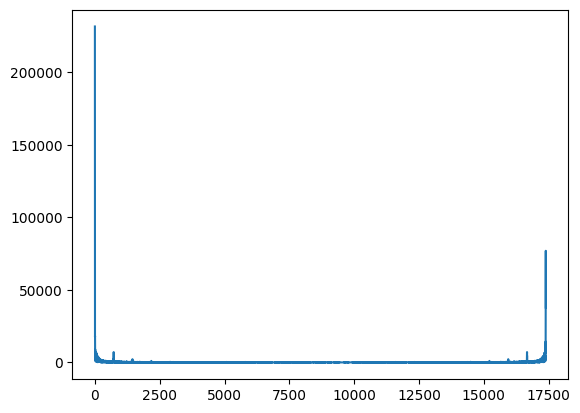

In [ ]:
from numpy.fft import fft
import matplotlib.pyplot as plt
import numpy as np
fft_series = fft(data['OT'])
plt.plot(np.abs(fft_series))


#Data processing and feature engineering



Handle Missing Data

In [ ]:
# Check for missing values in the dataset
missing_values = data.isnull().sum()
print(missing_values)


HUFL        0
HULL        0
MUFL        0
MULL        0
LUFL        0
LULL        0
OT          0
OT_MA_7     0
OT_MA_30    0
hour        0
day         0
weekday     0
month       0
OT_lag1     0
OT_lag2     0
dtype: int64


Feature Engineering

In [ ]:
data.head()

,HUFL,HULL,MUFL,MULL,LUFL,LULL,OT,OT_MA_7,OT_MA_30,hour,day,weekday,month,OT_lag1,OT_lag2
date,,,,,,,,,,,,,,,
2016-07-02 05:00:00,5.425,3.282,3.092,1.706,2.437,1.462,22.230,20.712143,21.031367,5,2,5,7,21.385,20.752001
2016-07-02 06:00:00,5.492,3.282,2.523,1.492,2.985,1.462,20.260,20.782429,20.689000,6,2,5,7,22.230,21.385000
2016-07-02 07:00:00,5.626,3.215,2.487,1.492,3.076,1.523,21.104,20.782429,20.466233,7,2,5,7,20.260,22.230000
2016-07-02 08:00:00,5.559,3.282,2.594,1.670,2.924,1.523,20.612,20.913143,20.227067,8,2,5,7,21.104,20.260000
2016-07-02 09:00:00,5.224,3.215,2.559,1.564,2.680,1.462,18.361,20.672000,20.004300,9,2,5,7,20.612,21.104000


In [ ]:
import numpy as np

# Creating cyclical seasonal features for hour and month
data['sin_hour'] = np.sin(2 * np.pi * data['hour'] / 24)
data['cos_hour'] = np.cos(2 * np.pi * data['hour'] / 24)
data['sin_month'] = np.sin(2 * np.pi * data['month'] / 12)
data['cos_month'] = np.cos(2 * np.pi * data['month'] / 12)


In [ ]:
# Additional lag features (lags of 24 hours and 168 hours (1 day and 1 week))
data['OT_lag24'] = data['OT'].shift(24)  # 1 day lag
data['OT_lag168'] = data['OT'].shift(168)  # 1 week lag


In [ ]:
# Rolling mean and standard deviation over different windows
data['OT_MA_3'] = data['OT'].rolling(window=3).mean()  # 3-hour rolling mean
data['OT_STD_3'] = data['OT'].rolling(window=3).std()  # 3-hour rolling std
data['OT_MA_24'] = data['OT'].rolling(window=24).mean()  # 1-day rolling mean
data['OT_STD_24'] = data['OT'].rolling(window=24).std()  # 1-day rolling std


In [ ]:
# Interaction between hour and sensor readings
data['HUFL_hour_interaction'] = data['HUFL'] * data['hour']
data['MUFL_month_interaction'] = data['MUFL'] * data['month']


In [ ]:
from sklearn.preprocessing import StandardScaler

# Scaling continuous columns (excluding cyclical features)
scaler = StandardScaler()
columns_to_scale = ['HUFL', 'HULL', 'MUFL', 'MULL', 'LUFL', 'LULL', 'OT',
                    'OT_MA_7', 'OT_MA_30', 'OT_lag1', 'OT_lag2', 'OT_lag24',
                    'OT_lag168', 'OT_MA_3', 'OT_STD_3', 'OT_MA_24', 'OT_STD_24']
data[columns_to_scale] = scaler.fit_transform(data[columns_to_scale])


In [ ]:
# Forward fill for any missing values
data = data.fillna(method='ffill')

# Alternatively, interpolation
data['OT'] = data['OT'].interpolate(method='linear')


<ipython-input-25-6b6b2a4bf4a0>:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data = data.fillna(method='ffill')


Feature selection

In [ ]:
# Correlation matrix to see the relationships between OT and other features
correlation_matrix = data.corr()
print(correlation_matrix['OT'].sort_values(ascending=False))


OT                        1.000000
OT_MA_3                   0.996848
OT_lag1                   0.994280
OT_MA_7                   0.989477
OT_lag2                   0.988697
OT_MA_24                  0.973538
OT_MA_30                  0.970704
OT_lag24                  0.940847
OT_lag168                 0.870961
OT_STD_24                 0.297343
month                     0.236491
HULL                      0.224298
MULL                      0.220169
OT_STD_3                  0.191912
MUFL_month_interaction    0.169586
LUFL                      0.118626
HUFL_hour_interaction     0.074083
LULL                      0.066043
HUFL                      0.060388
hour                      0.053438
MUFL                      0.051396
weekday                   0.011763
day                       0.007064
cos_hour                 -0.042567
sin_hour                 -0.074653
sin_month                -0.496232
cos_month                -0.519534
Name: OT, dtype: float64


In [ ]:
# Final dataset
print(data.head())


                         HUFL      HULL      MUFL      MULL      LUFL  \
date                                                                    
2016-07-02 05:00:00 -0.276217  0.509092 -0.177385  0.455415 -0.539866   
2016-07-02 06:00:00 -0.266744  0.509092 -0.260672  0.337228 -0.069481   
2016-07-02 07:00:00 -0.247799  0.476311 -0.265941  0.337228  0.008631   
2016-07-02 08:00:00 -0.257271  0.509092 -0.250279  0.435533 -0.121841   
2016-07-02 09:00:00 -0.304636  0.476311 -0.255402  0.376992 -0.331283   

                         LULL        OT   OT_MA_7  OT_MA_30  hour  ...  \
date                                                               ...   
2016-07-02 05:00:00  1.011144  1.040967  0.869190  0.918680     5  ...   
2016-07-02 06:00:00  1.011144  0.811019  0.877447  0.877891     6  ...   
2016-07-02 07:00:00  1.112906  0.909535  0.877447  0.851351     7  ...   
2016-07-02 08:00:00  1.112906  0.852106  0.892804  0.822857     8  ...   
2016-07-02 09:00:00  1.011144  0.589358  0.8

#Model Selection and Training

In [ ]:
# Define features and target variable
X = data.drop(columns=['OT'])  # Drop the target variable
y = data['OT']  # Target variable


In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


We will implement two models: Random Forest Regression and Gradient Boosting Regression. We will train each model and evaluate their performance.

A. Random Forest Regression

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model
rf_model.fit(X_train, y_train)

# Predict on the test set
rf_predictions = rf_model.predict(X_test)

# Evaluate the model
rf_mse = mean_squared_error(y_test, rf_predictions)
rf_r2 = r2_score(y_test, rf_predictions)

print(f"Random Forest MSE: {rf_mse:.2f}")
print(f"Random Forest R2 Score: {rf_r2:.2f}")


Random Forest MSE: 0.00
Random Forest R2 Score: 1.00


B. Gradient Boosting Regression

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
# Drop rows with NaN values
X_train_clean = X_train.dropna()
y_train_clean = y_train[X_train_clean.index]

X_test_clean = X_test.dropna()
y_test_clean = y_test[X_test_clean.index]

gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
# Train the model again
gb_model.fit(X_train_clean, y_train_clean)
gb_predictions = gb_model.predict(X_test_clean)

# Evaluate
gb_mse = mean_squared_error(y_test_clean, gb_predictions)
gb_r2 = r2_score(y_test_clean, gb_predictions)

print(f"Gradient Boosting MSE: {gb_mse:.2f}")
print(f"Gradient Boosting R2 Score: {gb_r2:.2f}")


Gradient Boosting MSE: 0.00
Gradient Boosting R2 Score: 1.00


In [ ]:
# Print a comparison of both models
print("Model Comparison:")
print(f"Random Forest MSE: {rf_mse:.2f}, R2 Score: {rf_r2:.2f}")
print(f"Gradient Boosting MSE: {gb_mse:.2f}, R2 Score: {gb_r2:.2f}")

# Determine the better model
if rf_r2 > gb_r2:
    print("Random Forest performs better.")
else:
    print("Gradient Boosting performs better.")


Model Comparison:
Random Forest MSE: 0.00, R2 Score: 1.00
Gradient Boosting MSE: 0.00, R2 Score: 1.00
Random Forest performs better.


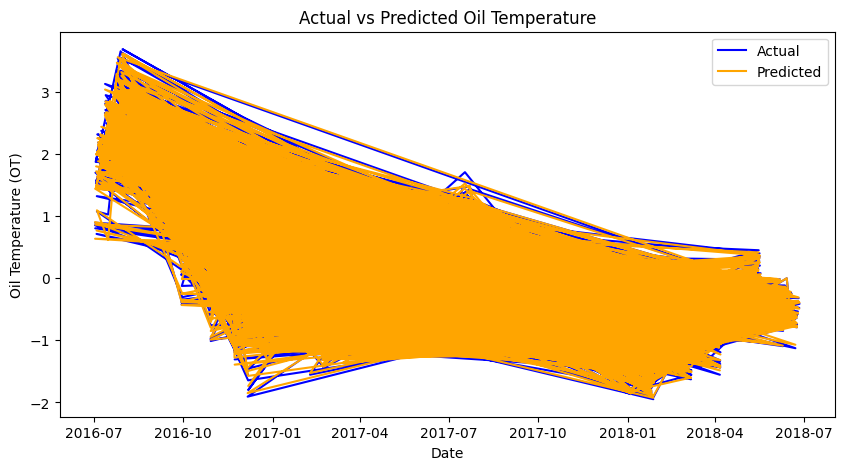

In [ ]:
import matplotlib.pyplot as plt

# Use the best model for predictions
predictions = rf_predictions if rf_r2 > gb_r2 else gb_predictions

# Plot actual vs predicted
plt.figure(figsize=(10, 5))
plt.plot(y_test.index, y_test, label='Actual', color='blue')
plt.plot(y_test.index, predictions, label='Predicted', color='orange')
plt.xlabel('Date')
plt.ylabel('Oil Temperature (OT)')
plt.title('Actual vs Predicted Oil Temperature')
plt.legend()
plt.show()


#Model evaluation and Result Analysis

A. Import Additional Libraries

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
import numpy as np


B. Add More Evaluation Metrics (MAE, RMSE)

In [ ]:
# Additional evaluation metrics
rf_mae = mean_absolute_error(y_test, rf_predictions)
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_predictions))

gb_mae = mean_absolute_error(y_test_clean, gb_predictions)
gb_rmse = np.sqrt(mean_squared_error(y_test_clean, gb_predictions))

# Print evaluation metrics for both models
print("Random Forest Evaluation:")
print(f"Mean Squared Error (MSE): {rf_mse:.2f}")
print(f"Mean Absolute Error (MAE): {rf_mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rf_rmse:.2f}")
print(f"R2 Score: {rf_r2:.2f}")

print("\nGradient Boosting Evaluation:")
print(f"Mean Squared Error (MSE): {gb_mse:.2f}")
print(f"Mean Absolute Error (MAE): {gb_mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {gb_rmse:.2f}")
print(f"R2 Score: {gb_r2:.2f}")


Random Forest Evaluation:
Mean Squared Error (MSE): 0.00
Mean Absolute Error (MAE): 0.03
Root Mean Squared Error (RMSE): 0.04
R2 Score: 1.00

Gradient Boosting Evaluation:
Mean Squared Error (MSE): 0.00
Mean Absolute Error (MAE): 0.05
Root Mean Squared Error (RMSE): 0.07
R2 Score: 1.00


C. Implement Cross-Validation

In [ ]:
# Perform 5-fold cross-validation for both models
rf_cv_scores = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
gb_cv_scores = cross_val_score(gb_model, X_train_clean, y_train_clean, cv=5, scoring='neg_mean_squared_error')

# Calculate the mean cross-validation score
rf_cv_mse = np.mean(-rf_cv_scores)
gb_cv_mse = np.mean(-gb_cv_scores)

print("\nCross-Validation Results:")
print(f"Random Forest CV MSE: {rf_cv_mse:.2f}")
print(f"Gradient Boosting CV MSE: {gb_cv_mse:.2f}")



Cross-Validation Results:
Random Forest CV MSE: 0.00
Gradient Boosting CV MSE: 0.00


D. Final Model Comparison Based on All Metrics

In [40]:
print("\nFinal Model Comparison:")
print(f"Random Forest - MSE: {rf_mse:.2f}, MAE: {rf_mae:.2f}, RMSE: {rf_rmse:.2f}, R2: {rf_r2:.2f}, CV MSE: {rf_cv_mse:.2f}")
print(f"Gradient Boosting - MSE: {gb_mse:.2f}, MAE: {gb_mae:.2f}, RMSE: {gb_rmse:.2f}, R2: {gb_r2:.2f}, CV MSE: {gb_cv_mse:.2f}")

if rf_cv_mse < gb_cv_mse:
    print("\nRandom Forest performs better on cross-validation.")
else:
    print("\nGradient Boosting performs better on cross-validation.")



Final Model Comparison:
Random Forest - MSE: 0.00, MAE: 0.03, RMSE: 0.04, R2: 1.00, CV MSE: 0.00
Gradient Boosting - MSE: 0.00, MAE: 0.05, RMSE: 0.07, R2: 1.00, CV MSE: 0.00

Random Forest performs better on cross-validation.


E. Plot Improvement for Better Visualization

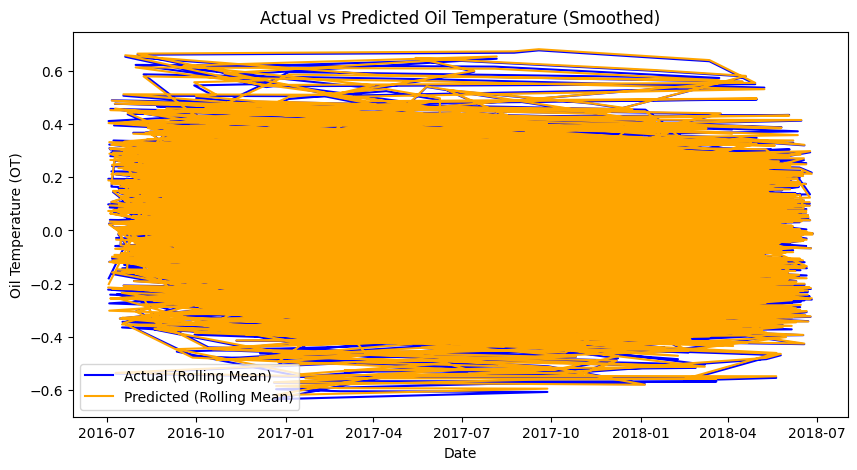

In [41]:
# Plot actual vs predicted with rolling mean for better visualization
plt.figure(figsize=(10, 5))
plt.plot(y_test.index, y_test.rolling(24).mean(), label='Actual (Rolling Mean)', color='blue')
plt.plot(y_test.index, pd.Series(predictions, index=y_test.index).rolling(24).mean(), label='Predicted (Rolling Mean)', color='orange')
plt.xlabel('Date')
plt.ylabel('Oil Temperature (OT)')
plt.title('Actual vs Predicted Oil Temperature (Smoothed)')
plt.legend()
plt.show()


#Exploring Improvements & Model Retraining


The visualization you have is cluttered, making it difficult to distinguish between the actual and predicted values clearly. Let’s work on improving the visualization and model further.

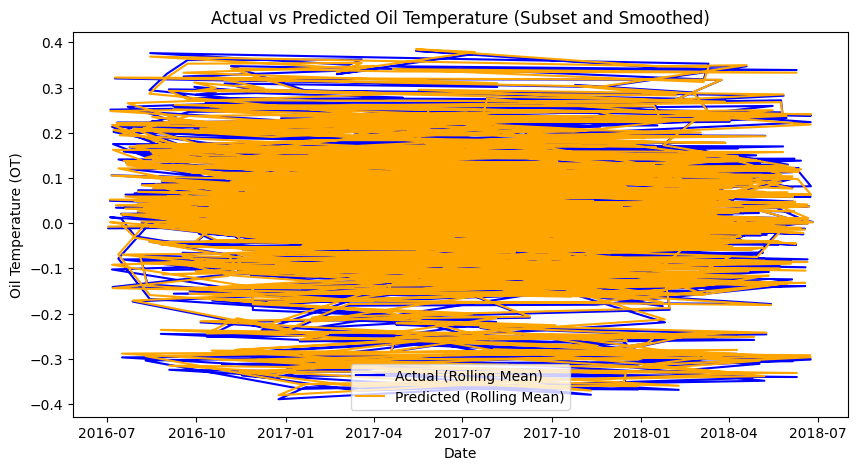

In [42]:
# Plot only a subset of the data to reduce clutter (here, first 1000 points)
subset_size = 1000
plt.figure(figsize=(10, 5))

plt.plot(y_test.index[:subset_size], y_test[:subset_size].rolling(48).mean(), label='Actual (Rolling Mean)', color='blue')
plt.plot(y_test.index[:subset_size], pd.Series(predictions[:subset_size], index=y_test.index[:subset_size]).rolling(48).mean(), label='Predicted (Rolling Mean)', color='orange')

plt.xlabel('Date')
plt.ylabel('Oil Temperature (OT)')
plt.title('Actual vs Predicted Oil Temperature (Subset and Smoothed)')
plt.legend()
plt.show()


Given that your MSE and RMSE are extremely low, there might be overfitting. This is indicated by the perfect R2 score = 1.00, which is uncommon in real-world data.

Add Regularization to the Models

In [43]:
# Limit tree depth to reduce overfitting
rf_model = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
rf_model.fit(X_train, y_train)


# Increase learning rate and reduce the number of trees
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=4, random_state=42)
gb_model.fit(X_train_clean, y_train_clean)


GradientBoostingRegressor(max_depth=4, random_state=42)

Cross-Validation with More Robust Scoring

In [44]:
# Perform 5-fold cross-validation with MAE
rf_cv_mae = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')
gb_cv_mae = cross_val_score(gb_model, X_train_clean, y_train_clean, cv=5, scoring='neg_mean_absolute_error')

# Convert negative MAE to positive
rf_cv_mae_mean = np.mean(-rf_cv_mae)
gb_cv_mae_mean = np.mean(-gb_cv_mae)

print("\nCross-Validation MAE Results:")
print(f"Random Forest CV MAE: {rf_cv_mae_mean:.2f}")
print(f"Gradient Boosting CV MAE: {gb_cv_mae_mean:.2f}")



Cross-Validation MAE Results:
Random Forest CV MAE: 0.03
Gradient Boosting CV MAE: 0.04


In [46]:
print(data.head())

                         HUFL      HULL      MUFL      MULL      LUFL  \
date                                                                    
2016-07-02 05:00:00 -0.276217  0.509092 -0.177385  0.455415 -0.539866   
2016-07-02 06:00:00 -0.266744  0.509092 -0.260672  0.337228 -0.069481   
2016-07-02 07:00:00 -0.247799  0.476311 -0.265941  0.337228  0.008631   
2016-07-02 08:00:00 -0.257271  0.509092 -0.250279  0.435533 -0.121841   
2016-07-02 09:00:00 -0.304636  0.476311 -0.255402  0.376992 -0.331283   

                         LULL        OT   OT_MA_7  OT_MA_30  hour  ...  \
date                                                               ...   
2016-07-02 05:00:00  1.011144  1.040967  0.869190  0.918680     5  ...   
2016-07-02 06:00:00  1.011144  0.811019  0.877447  0.877891     6  ...   
2016-07-02 07:00:00  1.112906  0.909535  0.877447  0.851351     7  ...   
2016-07-02 08:00:00  1.112906  0.852106  0.892804  0.822857     8  ...   
2016-07-02 09:00:00  1.011144  0.589358  0.8

#Trying Other Models

Applying LSTM for Multivariate Time Series Forecasting

In [47]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd

# Select features
features = ['HUFL', 'HULL', 'MUFL', 'MULL', 'LUFL', 'LULL', 'OT']

# Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data[features])

# Function to create dataset with look-back period
def create_lstm_dataset(data, time_step=24):
    X, y = [], []
    for i in range(len(data) - time_step - 1):
        X.append(data[i:(i + time_step), :-1])
        y.append(data[i + time_step, -1])
    return np.array(X), np.array(y)

# Prepare data for LSTM
time_step = 24  # Using past 24 hours to predict the next time step
X, y = create_lstm_dataset(scaled_data, time_step)


X = X.reshape(X.shape[0], X.shape[1], X.shape[2])

# Split into training and testing
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]


In [48]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Build LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))  # Predict the 'OT' value

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, batch_size=64, epochs=10)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
218/218 ━━━━━━━━━━━━━━━━━━━━ 9s 24ms/step - loss: 0.0295
Epoch 2/10
218/218 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - loss: 0.0279
Epoch 3/10
218/218 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0230
Epoch 4/10
218/218 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0196
Epoch 5/10
218/218 ━━━━━━━━━━━━━━━━━━━━ 10s 29ms/step - loss: 0.0150
Epoch 6/10
218/218 ━━━━━━━━━━━━━━━━━━━━ 9s 24ms/step - loss: 0.0141
Epoch 7/10
218/218 ━━━━━━━━━━━━━━━━━━━━ 10s 25ms/step - loss: 0.0122
Epoch 8/10
218/218 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.0123
Epoch 9/10
218/218 ━━━━━━━━━━━━━━━━━━━━ 9s 25ms/step - loss: 0.0110
Epoch 10/10
218/218 ━━━━━━━━━━━━━━━━━━━━ 10s 24ms/step - loss: 0.0111


109/109 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step


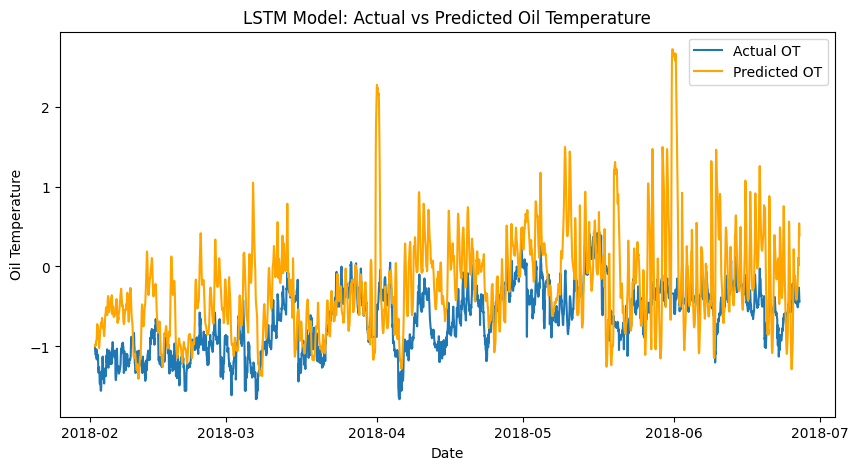

In [49]:
predictions = model.predict(X_test)

# Inverse transform the predictions and actual values
scaled_predictions = np.zeros((len(predictions), len(features)))
scaled_predictions[:, -1] = predictions[:, 0]  # Place predictions in the 'OT' column

# Inverse transform predictions back to original scale
actual_predictions = scaler.inverse_transform(scaled_predictions)[:, -1]

# Plot the actual vs predicted
plt.figure(figsize=(10, 5))
plt.plot(data.index[-len(y_test):], scaler.inverse_transform(scaled_data)[-len(y_test):, -1], label='Actual OT')
plt.plot(data.index[-len(y_test):], actual_predictions, label='Predicted OT', color='orange')
plt.title('LSTM Model: Actual vs Predicted Oil Temperature')
plt.xlabel('Date')
plt.ylabel('Oil Temperature')
plt.legend()
plt.show()


Applying ARIMA for Time Series Forecasting

In [50]:
from statsmodels.tsa.stattools import adfuller

# Check stationarity of OT
result = adfuller(data['OT'])
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')

if result[1] > 0.05:
    print("The series is not stationary. Differencing is required.")
    data['OT_diff'] = data['OT'].diff().dropna()
else:
    print("The series is stationary.")


ADF Statistic: -3.488647121111455
p-value: 0.00828349217588241
The series is stationary.


In [52]:
import warnings
import itertools
import numpy as np
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller

# Ignore warnings
warnings.filterwarnings("ignore")

# The grid search parameters
p = range(0, 4)
d = range(0, 2)
q = range(0, 4)

# Generate all different combinations of p, d, q triplets
pdq = list(itertools.product(p, d, q))

# Load or use the time series 'OT' data (univariate case for ARIMA)
ts_data = data['OT']

# Check if the series is stationary and difference if required
result = adfuller(ts_data.dropna())
if result[1] > 0.05:
    print("The series is not stationary. Applying differencing...")
    ts_data = ts_data.diff().dropna()  # First-order differencing (d=1)

# Function to evaluate and find the best parameters based on AIC
def grid_search_arima(ts_data, pdq):
    best_aic = np.inf
    best_order = None
    best_mdl = None

    for param in pdq:
        try:
            model = ARIMA(ts_data, order=param)
            results = model.fit()
            if results.aic < best_aic:
                best_aic = results.aic
                best_order = param
                best_mdl = results
            print(f"ARIMA{param} - AIC:{results.aic}")
        except Exception as e:
            print(f"ARIMA{param} failed. Error: {e}")
            continue
    return best_order, best_aic, best_mdl

# Perform grid search to find the best (p,d,q)
best_order, best_aic, best_mdl = grid_search_arima(ts_data, pdq)

# Print the best parameters and their corresponding AIC
print(f"\nBest ARIMA order: {best_order}")
print(f"Best AIC: {best_aic}")


ARIMA(0, 0, 0) - AIC:49357.52006572651
ARIMA(0, 0, 1) - AIC:27808.063297331326
ARIMA(0, 0, 2) - AIC:12544.27321415469
ARIMA(0, 0, 3) - AIC:2524.333046627806
ARIMA(0, 1, 0) - AIC:-28389.71911520753
ARIMA(0, 1, 1) - AIC:-28390.180908940838
ARIMA(0, 1, 2) - AIC:-28389.859721572433
ARIMA(0, 1, 3) - AIC:-28392.88237069576
ARIMA(1, 0, 0) - AIC:-28433.05592894375
ARIMA(1, 0, 1) - AIC:-28432.4869851014
ARIMA(1, 0, 2) - AIC:-28433.26128230986
ARIMA(1, 0, 3) - AIC:-28438.375652360155
ARIMA(1, 1, 0) - AIC:-28390.22635258978
ARIMA(1, 1, 1) - AIC:-28387.257928941068
ARIMA(1, 1, 2) - AIC:-28388.166306521514
ARIMA(1, 1, 3) - AIC:-28705.592251774084
ARIMA(2, 0, 0) - AIC:-28432.521290801764
ARIMA(2, 0, 1) - AIC:-28429.135412820247
ARIMA(2, 0, 2) - AIC:-28429.7375481801
ARIMA(2, 0, 3) - AIC:-28433.2174483902
ARIMA(2, 1, 0) - AIC:-28389.6037123206
ARIMA(2, 1, 1) - AIC:-28388.13540917709
ARIMA(2, 1, 2) - AIC:-28415.949529643898
ARIMA(2, 1, 3) - AIC:-28683.923505508672
ARIMA(3, 0, 0) - AIC:-28432.913462804

In [53]:
from statsmodels.tsa.arima.model import ARIMA

# Fit ARIMA model (used p, d, q based on above analysis)
model = ARIMA(data['OT'], order=(1, 1, 2))
arima_result = model.fit()

# Summary of the model
print(arima_result.summary())


                               SARIMAX Results                                
Dep. Variable:                     OT   No. Observations:                17391
Model:                 ARIMA(1, 1, 2)   Log Likelihood               14198.083
Date:                Sat, 12 Oct 2024   AIC                         -28388.166
Time:                        21:22:54   BIC                         -28357.112
Sample:                    07-02-2016   HQIC                        -28377.937
                         - 06-26-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2656      0.434      0.612      0.540      -0.584       1.116
ma.L1         -0.2777      0.433     -0.641      0.522      -1.127       0.572
ma.L2          0.0140      0.006      2.168      0.0

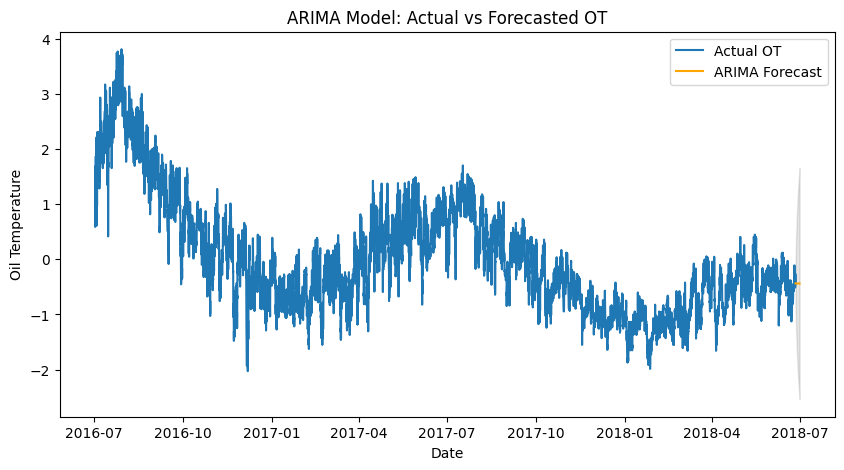

In [55]:
# Forecast next steps
forecast_steps = 100
forecast = arima_result.forecast(steps=forecast_steps)

# Get confidence intervals separately
conf_int = arima_result.get_forecast(steps=forecast_steps).conf_int()

# Create future index for plotting
future_index = pd.date_range(start=data.index[-1], periods=forecast_steps + 1, freq='H')[1:]

# Plot actual vs forecasted values
plt.figure(figsize=(10, 5))
plt.plot(data['OT'], label='Actual OT')
plt.plot(future_index, forecast, label='ARIMA Forecast', color='orange')
plt.fill_between(future_index, conf_int.iloc[:, 0], conf_int.iloc[:, 1], color='k', alpha=0.1)
plt.title('ARIMA Model: Actual vs Forecasted OT')
plt.xlabel('Date')
plt.ylabel('Oil Temperature')
plt.legend()
plt.show()
